# Battle of the Neighborhoods in Austin, TX - Where to open a Indian restaurant?

This project aims to utilize data science concepts and machine learning tools learned in the Coursera IBM Data Science Professional Certificate Course to solve a popular problem for restaurant owners: where is the best neighborhood to open a restaurant? In this project, I will go through the processes of problem definition, data preparation, and use machine learning to improve business decisions.

## Introduction

Austin is the capital of Texas in the United States and is one of the fastest growing cities in America. It was recently voted the No. 1 place to live in America for the third year in a row (U.S. News & World Report) and was ranked No.4 of the best large cities to start a business (WalletHub). According to Austin City Government, the City of Austin has crossed the threshold of becoming a Majority-Minority city, meaning that no demographic group exists as a majority of the City's population. One notable trend is the growing number of Latino and Asian households.

Being a fast-growing city with diverse ethnicities, Austin is a great place for entrepreneurs to start and grow their business. The city is also well known for its outstanding food and great live music venues.

Having lived in Austin for almost four years, I have always wondered why there aren't many authentic Indian restaurants in the Austin area and would love to see more. The objective of this project is to segment and cluster the neighborhoods of Austin using different data sources including Foursquare location data to find the 'best' neighborhood to open a Indian restaurant based on the venues in the area. I will

collect neighborhood data from Austin City Government,

use Google Geocoding API to find the approximate coordinates of the neighborhoods,

use Foursquare API to find the top 100 venues within a radius of 1500 meters of the center of the neighborhoods,

run k-means clustering on the data to cluster neighborhoods,

and I will also analyze demographic data for the neighborhoods and discuss data-driven decision making for a new Indian restaurant business in the city of Austin.

I'm excited to use my newly learned skills to explore Austin with data, let's begin!

## Target Audience

The target audience of this project would be anyone that is interested in opening or growing a Indian restaurant in Austin, TX. The cluster analysis of Austin neighborhoods and demographic data will help entrepreneurs make an informed decision about which neighborhoods to aim for.

## Data Acquisition and Cleaning

In [1]:
# Import the library we use to open URL 
import urllib.request 
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Data visualization modules
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 

# map rendering library
!pip install folium
import folium 
!pip install geopy

print('Libraries imported.')

Libraries imported.


## 1. Data Sources

To begin with, I gathered data on the reporting neighborhoods in the city of Austin. The neighborhood data I found is from the Housing and Planning Department of the Austin City Government: https://data.austintexas.gov/Building-and-Development/Neighborhoods/a7ap-j2yt; this dataset includes the names and geometric information of the different neighborhoods, and their sizes and shapes.

In [2]:
# The code was removed by Watson Studio for sharing.

,the_geom,FID,TARGET_FID,NEIGHNAME,SqMiles,Shape_Leng,Shape__Area,Shape__Length,Unnamed: 8
0,MULTIPOLYGON (((-97.670762852964 30.3085399639...,3,3,ANDERSON MILL,8.669086,154458.20540,2.416802e+08,154458.20540,NaN
1,MULTIPOLYGON (((-97.670762852964 30.3085399639...,95,95,WINDSOR PARK,2.383074,40527.37865,6.643628e+07,40527.37865,NaN
2,MULTIPOLYGON (((-97.753526659646 30.2387648363...,19,19,DAWSON,0.495535,17697.92500,1.381473e+07,17697.92500,NaN
3,MULTIPOLYGON (((-97.738154269236 30.3027463827...,91,91,WEST UNIVERSITY,0.738442,24981.04448,2.058658e+07,24981.04448,NaN
4,MULTIPOLYGON (((-97.682624533084 30.2858668623...,49,49,MLK,1.545283,33470.41543,4.308001e+07,33470.41543,NaN


In [3]:
# dropping irrelevant data

df_data_1 = df_data_1.drop(['FID', 'TARGET_FID', 'SqMiles', 'Shape_Leng', 'Shape__Area', 'Shape__Length'], axis = 1)
df_data_1.head()

,the_geom,NEIGHNAME,Unnamed: 8
0,MULTIPOLYGON (((-97.670762852964 30.3085399639...,ANDERSON MILL,NaN
1,MULTIPOLYGON (((-97.670762852964 30.3085399639...,WINDSOR PARK,NaN
2,MULTIPOLYGON (((-97.753526659646 30.2387648363...,DAWSON,NaN
3,MULTIPOLYGON (((-97.738154269236 30.3027463827...,WEST UNIVERSITY,NaN
4,MULTIPOLYGON (((-97.682624533084 30.2858668623...,MLK,NaN


### Data Cleansing


In [4]:
# Adding Austin, TX, USA to the neighborhood names to ensure google maps gets the correct data 
df=df_data_1
df['NEIGHNAME'] = df['NEIGHNAME'] + ', Austin, TX, USA'
df['NEIGHNAME'] = df['NEIGHNAME'].replace(['BLUFF SPRINGS, Austin, TX, USA'],'BLUFF SPRINGS, TX, USA')
df['NEIGHNAME'] = df['NEIGHNAME'].replace(['MANSFIELD--RIVER PLACE, Austin, TX, USA'],'RIVER PLACE, Austin, TX, USA')
df['NEIGHNAME'] = df['NEIGHNAME'].replace(['HAYS WARTHA, Austin, TX, USA'],'HAYS WARTHA, TX, USA')
df['NEIGHNAME'] = df['NEIGHNAME'].replace(['WEST UNIVERSITY, Austin, TX, USA'],'West Campus, Austin, TX, USA')
df['NEIGHNAME'] = df['NEIGHNAME'].replace(['WEST UNIVERSITY, Austin, TX, USA'],'West Campus, Austin, TX, USA')
df['NEIGHNAME'] = df['NEIGHNAME'].replace(['WALNUT CREEK--PIONEER HILL, Austin, TX, USA'],'PIONEER HILL, Austin, TX, USA')
df['NEIGHNAME'] = df['NEIGHNAME'].replace(['CIRCLE C SOUTH, Austin, TX, USA'],'Bear Creek, Austin, TX, USA')
df['NEIGHNAME'] = df['NEIGHNAME'].replace(['DITTMAR--SLAUGHTER, Austin, TX, USA'],'DITTMAR CROSSING, Austin,TX, USA')
df['NEIGHNAME'] = df['NEIGHNAME'].replace(['RMMA, Austin, TX, USA'],'Mueller, Austin,TX, USA')
df['NEIGHNAME'] = df['NEIGHNAME'].replace(['HAYS WARTHA, TX, USA'],'Hays, Austin,TX, USA')

df['NEIGHNAME'] = df['NEIGHNAME'].replace(['VILLAGE AT WESTERN OAKS, Austin, TX, USA'],'SENDERA, Austin,TX, USA')

df['NEIGHNAME'] = df['NEIGHNAME'].replace(['VILLAGE AT WESTERN OAKS, TX, USA'],'Bear Creek, Austin,TX, USA')
df['NEIGHNAME'] = df['NEIGHNAME'].replace(['DEL VALLE, Austin, TX, USA'],'Montopolis, Austin, TX, USA')
df['NEIGHNAME'] = df['NEIGHNAME'].replace(['ROBINSON RANCH, Austin, TX, USA'],'JEFFERSON CENTER, Austin, TX, USA')

df['NEIGHNAME'] = df['NEIGHNAME'].replace(['DEL VALLE EAST, Austin, TX, USA'],'Green Grove, Austin, TX, USA')
df['NEIGHNAME'] = df['NEIGHNAME'].replace(['UPPER BOGGY CREEK, Austin, TX, USA'],'South Creek, Austin, TX, USA')

df['NEIGHNAME'] = df['NEIGHNAME'].replace(['NORTH SHOAL CREEK, Austin, TX, USA'],'Wooten, Austin, TX, USA')

df['NEIGHNAME'] = df['NEIGHNAME'].replace(['WHISPER VALLEY, Austin, TX, USA'],'Daffan, Austin, TX, USA')

df['NEIGHNAME'] = df['NEIGHNAME'].replace(['NORTH LAMAR RUNDBERG, Austin, TX, USA'],'NORTH LAMAR, Austin, TX, USA')
df['NEIGHNAME'] = df['NEIGHNAME'].replace(['AVERY RANCH--LAKELINE, Austin, TX, USA'],'ANDERSON MILL, Austin, TX, USA')
df['NEIGHNAME'] = df['NEIGHNAME'].replace(['BARTON CREEK MALL, Austin, TX, USA'],'STONERIDGE PLACE, Austin, TX, USA')

df['NEIGHNAME'] = df['NEIGHNAME'].replace(['NORTH UNIVERSITY, Austin, TX, USA'],'CENTRAL AUSTIN, Austin, TX, USA')

In [5]:
df.head(105)

,the_geom,NEIGHNAME,Unnamed: 8
0,MULTIPOLYGON (((-97.670762852964 30.3085399639...,"ANDERSON MILL, Austin, TX, USA",NaN
1,MULTIPOLYGON (((-97.670762852964 30.3085399639...,"WINDSOR PARK, Austin, TX, USA",NaN
2,MULTIPOLYGON (((-97.753526659646 30.2387648363...,"DAWSON, Austin, TX, USA",NaN
3,MULTIPOLYGON (((-97.738154269236 30.3027463827...,"West Campus, Austin, TX, USA",NaN
4,MULTIPOLYGON (((-97.682624533084 30.2858668623...,"MLK, Austin, TX, USA",NaN
5,MULTIPOLYGON (((-97.735771499856 30.2497814277...,"SOUTH RIVER CITY, Austin, TX, USA",NaN
6,MULTIPOLYGON (((-97.652535391419 30.3022521936...,"MLK-183, Austin, TX, USA",NaN
7,MULTIPOLYGON (((-97.750580735344 30.2799550108...,"OLD WEST AUSTIN, Austin, TX, USA",NaN
8,MULTIPOLYGON (((-97.745461987741 30.2608413855...,"BOULDIN CREEK, Austin, TX, USA",NaN
9,MULTIPOLYGON (((-97.659354772998 30.3645671610...,"PIONEER HILL, Austin, TX, USA",NaN


In [6]:
from geopy.geocoders import Nominatim
address = 'CENTRAL AUSTIN, Austin, TX, USA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of DEL VALLE RIO are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of DEL VALLE RIO are 30.2988785, -97.7390157.


In [7]:
location = [x for x in df['NEIGHNAME'].unique().tolist() 
            if type(x) == str]
latitude = []
longitude =  []
for i in range(0, len(location)):
    # remove things that does not seem usefull here
    try:
        address = location[i]
        geolocator = Nominatim(user_agent="ny_explorer")
        loc = geolocator.geocode(address)
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)
        print('The geographical coordinate of location are {}, {}.'.format(loc.latitude, loc.longitude))
    except:
        # in the case the geolocator does not work, then add nan element to list
        # to keep the right size
        latitude.append(np.nan)
        longitude.append(np.nan)
# create a dataframe with the locatio, latitude and longitude
df_ = pd.DataFrame({'NEIGHNAME':location, 
                    'latitude': latitude,
                    'longitude':longitude})
# merge on Restaurant_Location with df to get the column 
new_df = df.merge(df_, on='NEIGHNAME', how='left')
new_df.head(105)

The geographical coordinate of location are 30.4558345, -97.8070957.
The geographical coordinate of location are 30.3135492, -97.6910953.
The geographical coordinate of location are 30.2337193, -97.7616825.
The geographical coordinate of location are 30.2902076, -97.7473841.
The geographical coordinate of location are 30.2840353, -97.6940012.
The geographical coordinate of location are 30.2494427, -97.7455576.
The geographical coordinate of location are 30.2793983, -97.6739222.
The geographical coordinate of location are 30.296822, -97.7548514.
The geographical coordinate of location are 30.255667, -97.7554813.
The geographical coordinate of location are 30.3744341, -97.6536765.
The geographical coordinate of location are 30.2711286, -97.7436995.
The geographical coordinate of location are 30.3175801, -97.6739168.
The geographical coordinate of location are 30.2898985, -97.7565407.
The geographical coordinate of location are 30.3742235, -97.7994282.
The geographical coordinate of locat

,the_geom,NEIGHNAME,Unnamed: 8,latitude,longitude
0,MULTIPOLYGON (((-97.670762852964 30.3085399639...,"ANDERSON MILL, Austin, TX, USA",NaN,30.455835,-97.807096
1,MULTIPOLYGON (((-97.670762852964 30.3085399639...,"WINDSOR PARK, Austin, TX, USA",NaN,30.313549,-97.691095
2,MULTIPOLYGON (((-97.753526659646 30.2387648363...,"DAWSON, Austin, TX, USA",NaN,30.233719,-97.761683
3,MULTIPOLYGON (((-97.738154269236 30.3027463827...,"West Campus, Austin, TX, USA",NaN,30.290208,-97.747384
4,MULTIPOLYGON (((-97.682624533084 30.2858668623...,"MLK, Austin, TX, USA",NaN,30.284035,-97.694001
5,MULTIPOLYGON (((-97.735771499856 30.2497814277...,"SOUTH RIVER CITY, Austin, TX, USA",NaN,30.249443,-97.745558
6,MULTIPOLYGON (((-97.652535391419 30.3022521936...,"MLK-183, Austin, TX, USA",NaN,30.279398,-97.673922
7,MULTIPOLYGON (((-97.750580735344 30.2799550108...,"OLD WEST AUSTIN, Austin, TX, USA",NaN,30.296822,-97.754851
8,MULTIPOLYGON (((-97.745461987741 30.2608413855...,"BOULDIN CREEK, Austin, TX, USA",NaN,30.255667,-97.755481
9,MULTIPOLYGON (((-97.659354772998 30.3645671610...,"PIONEER HILL, Austin, TX, USA",NaN,30.374434,-97.653677


In [8]:
new_df.head(105)

,the_geom,NEIGHNAME,Unnamed: 8,latitude,longitude
0,MULTIPOLYGON (((-97.670762852964 30.3085399639...,"ANDERSON MILL, Austin, TX, USA",NaN,30.455835,-97.807096
1,MULTIPOLYGON (((-97.670762852964 30.3085399639...,"WINDSOR PARK, Austin, TX, USA",NaN,30.313549,-97.691095
2,MULTIPOLYGON (((-97.753526659646 30.2387648363...,"DAWSON, Austin, TX, USA",NaN,30.233719,-97.761683
3,MULTIPOLYGON (((-97.738154269236 30.3027463827...,"West Campus, Austin, TX, USA",NaN,30.290208,-97.747384
4,MULTIPOLYGON (((-97.682624533084 30.2858668623...,"MLK, Austin, TX, USA",NaN,30.284035,-97.694001
5,MULTIPOLYGON (((-97.735771499856 30.2497814277...,"SOUTH RIVER CITY, Austin, TX, USA",NaN,30.249443,-97.745558
6,MULTIPOLYGON (((-97.652535391419 30.3022521936...,"MLK-183, Austin, TX, USA",NaN,30.279398,-97.673922
7,MULTIPOLYGON (((-97.750580735344 30.2799550108...,"OLD WEST AUSTIN, Austin, TX, USA",NaN,30.296822,-97.754851
8,MULTIPOLYGON (((-97.745461987741 30.2608413855...,"BOULDIN CREEK, Austin, TX, USA",NaN,30.255667,-97.755481
9,MULTIPOLYGON (((-97.659354772998 30.3645671610...,"PIONEER HILL, Austin, TX, USA",NaN,30.374434,-97.653677


In [9]:
new_df.shape

(103, 5)

## 2. Explore Neighborhoods

In [10]:
# create map of Austin using latitude and longitude values
map_austin = folium.Map(location=[30.2672, -97.7431], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(new_df['latitude'], new_df['longitude'], new_df['NEIGHNAME']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#FF0000',
        fill_opacity=0.9,
        parse_html=False).add_to(map_austin)  
    
map_austin

In [11]:
map_austin.save('map_austin.html')

Now it's time to find the venues around the center of these neighborhoods. I will request this data from Foursquare API and collect information for the top 100 venues in the neighborhoods within a radius of 1500 meters.

In [12]:
# Define Foursquare Credentials and Version
CLIENT_ID = 'KDGSPKOLCYNJRBPNA14NBHZ0LIIINDCCE2C0RDVQJIWLMDBI' # your Foursquare ID
CLIENT_SECRET = 'B5D3HXE3WT1M23RSCZCV4QGVZDCWDVZMQAHZPDGQ0300HMFI' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KDGSPKOLCYNJRBPNA14NBHZ0LIIINDCCE2C0RDVQJIWLMDBI
CLIENT_SECRET:B5D3HXE3WT1M23RSCZCV4QGVZDCWDVZMQAHZPDGQ0300HMFI


In [13]:
# Create function that gets the top 100 venues that are in the neighbourhoods within a radius of 1500 meters 
def getNearbyVenues (names, latitudes, longitudes, radius= 1500):
    
    venue_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venue_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venue_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [14]:
austin_venues = getNearbyVenues(names=new_df['NEIGHNAME'],
                                  latitudes=new_df['latitude'],
                                  longitudes=new_df['longitude']
                                  )

ANDERSON MILL, Austin, TX, USA
WINDSOR PARK, Austin, TX, USA
DAWSON, Austin, TX, USA
West Campus, Austin, TX, USA
MLK, Austin, TX, USA
SOUTH RIVER CITY, Austin, TX, USA
MLK-183, Austin, TX, USA
OLD WEST AUSTIN, Austin, TX, USA
BOULDIN CREEK, Austin, TX, USA
PIONEER HILL, Austin, TX, USA
SOUTHEAST, Austin, TX, USA
UNIVERSITY HILLS, Austin, TX, USA
WINDSOR ROAD, Austin, TX, USA
JESTER, Austin, TX, USA
Bear Creek, Austin, TX, USA
WESTGATE, Austin, TX, USA
GALINDO, Austin, TX, USA
BRODIE LANE, Austin, TX, USA
HYDE PARK, Austin, TX, USA
MCKINNEY, Austin, TX, USA
WESTOVER HILLS, Austin, TX, USA
GRACY WOODS, Austin, TX, USA
PLEASANT VALLEY, Austin, TX, USA
SOUTH LAMAR, Austin, TX, USA
PECAN SPRINGS-SPRINGDALE, Austin, TX, USA
FOUR POINTS, Austin, TX, USA
POND SPRINGS, Austin, TX, USA
ST. EDWARDS, Austin, TX, USA
UT, Austin, TX, USA
HIGHLAND, Austin, TX, USA
DOWNTOWN, Austin, TX, USA
HANCOCK, Austin, TX, USA
DITTMAR CROSSING, Austin,TX, USA
TECH RIDGE, Austin, TX, USA
SAMSUNG--PIONEER CROSSING

In [15]:
austin_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"ANDERSON MILL, Austin, TX, USA",30.455835,-97.807096,Millrun Park,30.451548,-97.802975,Park
1,"ANDERSON MILL, Austin, TX, USA",30.455835,-97.807096,Freda's Seafood Grille,30.464196,-97.803776,Seafood Restaurant
2,"ANDERSON MILL, Austin, TX, USA",30.455835,-97.807096,Interstellar Bbq,30.461178,-97.814930,BBQ Joint
3,"ANDERSON MILL, Austin, TX, USA",30.455835,-97.807096,CC Zing,30.460979,-97.816818,Smoothie Shop
4,"ANDERSON MILL, Austin, TX, USA",30.455835,-97.807096,Almarah Mediterranean Cuisine,30.461054,-97.817103,Mediterranean Restaurant


In [16]:
print(austin_venues.shape)
austin_venues.head()

(6840, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"ANDERSON MILL, Austin, TX, USA",30.455835,-97.807096,Millrun Park,30.451548,-97.802975,Park
1,"ANDERSON MILL, Austin, TX, USA",30.455835,-97.807096,Freda's Seafood Grille,30.464196,-97.803776,Seafood Restaurant
2,"ANDERSON MILL, Austin, TX, USA",30.455835,-97.807096,Interstellar Bbq,30.461178,-97.814930,BBQ Joint
3,"ANDERSON MILL, Austin, TX, USA",30.455835,-97.807096,CC Zing,30.460979,-97.816818,Smoothie Shop
4,"ANDERSON MILL, Austin, TX, USA",30.455835,-97.807096,Almarah Mediterranean Cuisine,30.461054,-97.817103,Mediterranean Restaurant


Here we group the venues by the neighborhood and we can see that some neighborhoods have more venues closer together while other neighborhoods' venues are more spaced out.

In [17]:
# Group venues by Neighborhood

austin_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"ALLANDALE, Austin, TX, USA",92,92,92,92,92,92
"ANDERSON MILL, Austin, TX, USA",162,162,162,162,162,162
"BARTON HILLS, Austin, TX, USA",93,93,93,93,93,93
"BERGSTROM, Austin, TX, USA",47,47,47,47,47,47
"BLUFF SPRINGS, TX, USA",12,12,12,12,12,12
"BOULDIN CREEK, Austin, TX, USA",100,100,100,100,100,100
"BRENTWOOD, Austin, TX, USA",82,82,82,82,82,82
"BRODIE LANE, Austin, TX, USA",100,100,100,100,100,100
"BULL CREEK, Austin, TX, USA",6,6,6,6,6,6


In [18]:
print('There are {} unique categories.'.format(len(austin_venues['Venue Category'].unique())))

There are 352 unique categories.


# 3. Explore Indian Restaurants in Austin

Before we get into clustering, I'm creating a new dataframe with all the Indian restaurant data that was returned by Foursquare API. Since some of these venues were double counted, I will drop them in order to make a map of these restaurants.

In [19]:
Indian_food = austin_venues[austin_venues['Venue Category'].str.contains("Indian Restaurant")]
Indian_food.shape

(23, 7)

In [20]:
Indian_food

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
269,"West Campus, Austin, TX, USA",30.290208,-97.747384,Teji's Indian Restaurant,30.283947,-97.742057,Indian Restaurant
290,"West Campus, Austin, TX, USA",30.290208,-97.747384,The Clay Pit,30.279001,-97.742453,Indian Restaurant
495,"SOUTH RIVER CITY, Austin, TX, USA",30.249443,-97.745558,G'Raj Mahal Cafe,30.258324,-97.738793,Indian Restaurant
1000,"WESTGATE, Austin, TX, USA",30.223210,-97.797043,Bombay Bistro - South Lamar,30.235934,-97.795419,Indian Restaurant
1178,"BRODIE LANE, Austin, TX, USA",30.221112,-97.825761,Tarka Indian Kitchen,30.231031,-97.817509,Indian Restaurant
1184,"BRODIE LANE, Austin, TX, USA",30.221112,-97.825761,Biryani-N-Grill,30.215021,-97.833375,South Indian Restaurant
1606,"SOUTH LAMAR, Austin, TX, USA",30.236389,-97.782647,Bombay Bistro - South Lamar,30.235934,-97.795419,Indian Restaurant
2076,"HIGHLAND, Austin, TX, USA",30.328895,-97.715847,Taj Palace,30.328851,-97.707309,Indian Restaurant
2354,"TECH RIDGE, Austin, TX, USA",30.407091,-97.666131,Bombay Express,30.411125,-97.676020,Indian Restaurant
2364,"TECH RIDGE, Austin, TX, USA",30.407091,-97.666131,Indian Spicy Kitchen,30.406676,-97.672824,Indian Restaurant


In [21]:
# Drop duplicates as some were double counted

Indian_food = Indian_food.drop_duplicates(subset=['Venue Latitude', 'Venue Longitude'], keep='last')

In [22]:
Indian_food.shape

(18, 7)

In [23]:
# create map of Austin using latitude and longitude values
Indian_food_map = folium.Map(location=[30.2672, -97.7431], zoom_start=11)

# add markers to map
for lat, lng, name in zip(Indian_food['Venue Latitude'], Indian_food['Venue Longitude'], Indian_food['Venue']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='lightpink',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(Indian_food_map)  
    
Indian_food_map

In [24]:
Indian_food_map.save('map_austin_Indian_restaurants.html')

From this map, we can tell that a lot of the Indian restaurants in Austin are located in the northern and southern parts of Austin with some in the central Metropolitan area, not so many in the West Lake Hills area or the eastern neighborhoods.

In [25]:
print('There are approximately {} Indian restaurants in Austin'.format((Indian_food['Venue'].count())))

There are approximately 18 Indian restaurants in Austin


## One Hot Encoding


Previously, we collected data on venues in Austin with their names and coordinates. However, to run machine learning algorithms on the data, we need numerical data about the existence of these venues. One hot encoding helps us do that by creating new (binary) columns to indicate the presence of each possible value from the original data. This means that each venue in each neighborhood will be labeled as 1 in their correct category. After this, we group the dataframe by the neighborhoods to get the mean of the frequency of occurence of each venue category.

# 1. Analyze Neighborhoods

In [26]:
# one hot encoding
austin_onehot = pd.get_dummies(austin_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
austin_onehot['Neighborhood'] = austin_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [austin_onehot.columns[-1]] + list(austin_onehot.columns[:-1])
austin_onehot = austin_onehot[fixed_columns]

austin_onehot.head()

,Neighborhood,ATM,Accessories Store,Adult Boutique,Advertising Agency,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Assisted Living,Athletics & Sports,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bike Trail,Board Shop,Bookstore,Boutique,Bowling Alley,Boxing Gym,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Capitol Building,Caribbean Restaurant,Carpet Store,Casino,Cemetery,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Churrascaria,Circus School,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Basketball Court,College Bookstore,College Quad,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drive-in Theater,Dry Cleaner,Electronics Store,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fire Station,Fish Market,Fishing Spot,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gluten-free Restaurant,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotel Pool,Housing Development,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Lawyer,Light Rail Station,Lighthouse,Lighting Store,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Medical Supply Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Mongolian Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Paper / Office Supplies Store,Park,Parking,Pawn Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Print Shop,Pub,Public Art,RV Park,Rafting,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Restaurant,Rock Club,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping 

In [27]:
austin_grouped = austin_onehot.groupby('Neighborhood').mean().reset_index()
austin_grouped.head()

,Neighborhood,ATM,Accessories Store,Adult Boutique,Advertising Agency,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Assisted Living,Athletics & Sports,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bike Trail,Board Shop,Bookstore,Boutique,Bowling Alley,Boxing Gym,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Capitol Building,Caribbean Restaurant,Carpet Store,Casino,Cemetery,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Churrascaria,Circus School,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Basketball Court,College Bookstore,College Quad,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drive-in Theater,Dry Cleaner,Electronics Store,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fire Station,Fish Market,Fishing Spot,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gluten-free Restaurant,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotel Pool,Housing Development,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Lawyer,Light Rail Station,Lighthouse,Lighting Store,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Medical Supply Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Mongolian Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Paper / Office Supplies Store,Park,Parking,Pawn Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Print Shop,Pub,Public Art,RV Park,Rafting,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Restaurant,Rock Club,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping 

In [28]:
austin_grouped.shape

(101, 353)

## 2. Indian Restaurnant One Hot Encoding

With the previous data frame (austin_grouped), I filtered out on the 'Indian Restaurant' category. This will tell us the average frequency of occurance of Indian restaurants in each neighborhood.

In [29]:
Indian_restuarant = austin_grouped[['Neighborhood', 'Indian Restaurant']]
Indian_restuarant.head(100)

,Neighborhood,Indian Restaurant
0,"ALLANDALE, Austin, TX, USA",0.000000
1,"ANDERSON MILL, Austin, TX, USA",0.000000
2,"BARTON HILLS, Austin, TX, USA",0.000000
3,"BERGSTROM, Austin, TX, USA",0.000000
4,"BLUFF SPRINGS, TX, USA",0.000000
5,"BOULDIN CREEK, Austin, TX, USA",0.000000
6,"BRENTWOOD, Austin, TX, USA",0.000000
7,"BRODIE LANE, Austin, TX, USA",0.010000
8,"BULL CREEK, Austin, TX, USA",0.000000
9,"Bear Creek, Austin, TX, USA",0.000000


# Machine Learning - Cluster Neighborhoods

We are ready to get into machine learning! For this project, I am using k-means clustering. To begin with, a cluster is a collection of data points aggregated together based on their similarities. Using machine learning algorithms, we can cluster the neighborhoods based on their similarities with each other. K-means algorithm, in particular, first identifies k number of centroids, and then allocates every data point to the cluster, in a way that the data point is closer to that cluster's centroid than any other centroid. K-means algorithm runs this in a repetitive fashion before the centroids are stablized and the clusters are formed. I am using this method because it is an unsupervised learning method meaning that the algorithm will find the similarities betwen the data points for us given we don't know them to begin with.

In [30]:
Indian_rest_cluster = Indian_restuarant.drop('Neighborhood', 1)

In [31]:
Indian_rest_cluster.head()

,Indian Restaurant
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


### Visualize the Average Frequency of Indian Restaurants of Each Neighborhood

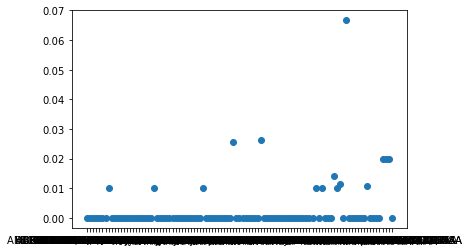

In [32]:
plt.scatter(Indian_restuarant['Neighborhood'],Indian_restuarant['Indian Restaurant'])

### 1. Find best K

One limitation of k-means clustering is that the algorithm does not decide how many clusters to form on its own and we need to find the best K to make clustering more accurate. The Elbow Method is one of the most popular methods to determine this optimal value of k. We iterate the values of k from 1 to 10 and calculate the distortion and inertia values for each value of k in the given range. Distortion is the average of the squared distances from the cluster centers of the respective clusters while inertia is the sum of squared distances of samples to their closest cluster center.

1 : 0.0046375042105514215
2 : 0.0022623912180743935
3 : 0.0007433097749282881
4 : 0.00022827277445477547
5 : 9.289243480137713e-05
6 : 3.835237575756618e-05
7 : 1.751474016505813e-05
8 : 6.6808300263239765e-06
9 : 3.4350959920332814e-20


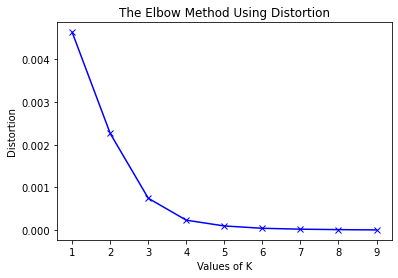

In [33]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(Indian_rest_cluster) 
    kmeanModel.fit(Indian_rest_cluster)     
      
    distortions.append(sum(np.min(cdist(Indian_rest_cluster, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / Indian_rest_cluster.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(Indian_rest_cluster, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / Indian_rest_cluster.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method Using Distortion') 
plt.show() 

1 : 0.0072948105517633656
2 : 0.002655757214940032
3 : 0.0004979148330858002
4 : 5.954771907100112e-05
5 : 1.665809076479496e-05
6 : 2.2993973534365167e-06
7 : 5.768738353614513e-07
8 : 2.2765311493204062e-07
9 : 0.0


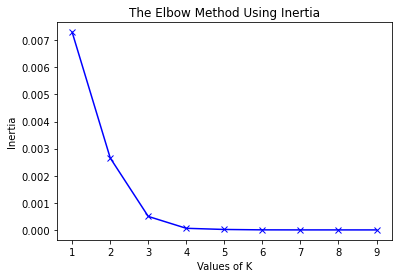

In [34]:
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 

plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method Using Inertia') 
plt.show() 

To determine the optimal number of K, we select the value of k at the “elbow” of the plots, the point after which the distortion/inertia starts decreasing in a linear fashion. Given these plots, we conclude that 4-5 clusters would work best for our data. Ultimately, I decided to go with 5.

## 2. Visualize Scatterplot with the 5 Clusters

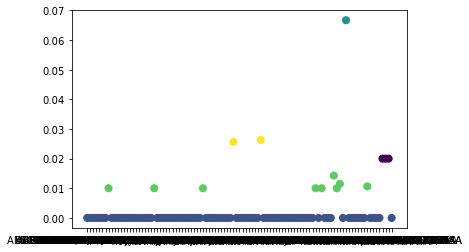

In [35]:
labels = KMeans(5, random_state=0).fit_predict(Indian_rest_cluster)
plt.scatter(Indian_restuarant['Neighborhood'], Indian_restuarant['Indian Restaurant'], c=labels,
            s=50, cmap='viridis');

## 3. Run K-Means to Cluster Neighborhoods

In [36]:
# Run k-means to cluster neighbourhoods into 4 clusters

# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Indian_rest_cluster)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[1:10]

array([1, 1, 1, 1, 1, 1, 3, 1, 1], dtype=int32)

In [37]:
Indian_rest_cluster.shape

(101, 1)

In [38]:
Indian_restuarant.shape

(101, 2)

In [39]:
Indian_restuarant.head(101)

,Neighborhood,Indian Restaurant
0,"ALLANDALE, Austin, TX, USA",0.000000
1,"ANDERSON MILL, Austin, TX, USA",0.000000
2,"BARTON HILLS, Austin, TX, USA",0.000000
3,"BERGSTROM, Austin, TX, USA",0.000000
4,"BLUFF SPRINGS, TX, USA",0.000000
5,"BOULDIN CREEK, Austin, TX, USA",0.000000
6,"BRENTWOOD, Austin, TX, USA",0.000000
7,"BRODIE LANE, Austin, TX, USA",0.010000
8,"BULL CREEK, Austin, TX, USA",0.000000
9,"Bear Creek, Austin, TX, USA",0.000000


In [40]:
#Indian_res_merged.shape

In [41]:
#Indian_res_merged.head(105)

In [42]:
Indian_restuarant.insert(0, 'Cluster Labels', kmeans.labels_)

# Examine Clusters

We created 5 clusters (cluster 0 - 4) using k-means. Now let's look at each cluster more closely.

## Cluster 0

As we can tell from the dataframe below, cluster 0 has an average frequency of Indian restaurant of 0. It means that Indian restaurants are not very common in these neighborhoods.

In [43]:
cluster0 = Indian_restuarant.loc[Indian_restuarant['Cluster Labels'] == 0]
cluster0

,Cluster Labels,Neighborhood,Indian Restaurant
97,0,"WOOTEN, Austin, TX, USA",0.02
98,0,"West Campus, Austin, TX, USA",0.02
99,0,"Wooten, Austin, TX, USA",0.02


## Cluster 1

Cluster 1 seems to have more Indian restaurants than Cluster 0

In [44]:
cluster1 = Indian_restuarant.loc[Indian_restuarant['Cluster Labels'] == 1]
cluster1

,Cluster Labels,Neighborhood,Indian Restaurant
0,1,"ALLANDALE, Austin, TX, USA",0.0
1,1,"ANDERSON MILL, Austin, TX, USA",0.0
2,1,"BARTON HILLS, Austin, TX, USA",0.0
3,1,"BERGSTROM, Austin, TX, USA",0.0
4,1,"BLUFF SPRINGS, TX, USA",0.0
5,1,"BOULDIN CREEK, Austin, TX, USA",0.0
6,1,"BRENTWOOD, Austin, TX, USA",0.0
8,1,"BULL CREEK, Austin, TX, USA",0.0
9,1,"Bear Creek, Austin, TX, USA",0.0
10,1,"CENTRAL AUSTIN, Austin, TX, USA",0.0


## Cluster 2

So far, Cluster 2 has the highest frequency of Indian restaurants.

In [45]:
cluster2 = Indian_restuarant.loc[Indian_restuarant['Cluster Labels'] == 2]
cluster2

,Cluster Labels,Neighborhood,Indian Restaurant
85,2,"TECH RIDGE, Austin, TX, USA",0.066667


## Cluster 3

In [46]:
cluster3 = Indian_restuarant.loc[Indian_restuarant['Cluster Labels'] == 3]
cluster3

,Cluster Labels,Neighborhood,Indian Restaurant
7,3,"BRODIE LANE, Austin, TX, USA",0.010000
22,3,"EAST CESAR CHAVEZ, Austin, TX, USA",0.010000
38,3,"HIGHLAND, Austin, TX, USA",0.010000
75,3,"SOUTH LAMAR, Austin, TX, USA",0.010000
77,3,"SOUTH RIVER CITY, Austin, TX, USA",0.010000
81,3,"ST. JOHNS, Austin, TX, USA",0.014286
82,3,"STONERIDGE PLACE, Austin, TX, USA",0.010000
83,3,"SWEETBRIAR, Austin, TX, USA",0.011494
92,3,"WESTGATE, Austin, TX, USA",0.010638


## Cluster 4

In [47]:
cluster4 = Indian_restuarant.loc[Indian_restuarant['Cluster Labels'] == 4]
cluster4

,Cluster Labels,Neighborhood,Indian Restaurant
48,4,"MCNEIL, Austin, TX, USA",0.025641
57,4,"NORTHWEST HILLS, Austin, TX, USA",0.026316


In [48]:
clusters = Indian_restuarant.groupby('Neighborhood').mean()
clusters.head()

,Cluster Labels,Indian Restaurant
Neighborhood,,
"ALLANDALE, Austin, TX, USA",1,0.0
"ANDERSON MILL, Austin, TX, USA",1,0.0
"BARTON HILLS, Austin, TX, USA",1,0.0
"BERGSTROM, Austin, TX, USA",1,0.0
"BLUFF SPRINGS, TX, USA",1,0.0


In [49]:
c0 = clusters.loc[clusters['Cluster Labels'] == 0]
c1 = clusters.loc[clusters['Cluster Labels'] == 1]
c2 = clusters.loc[clusters['Cluster Labels'] == 2]
c3 = clusters.loc[clusters['Cluster Labels'] == 3]
c4 = clusters.loc[clusters['Cluster Labels'] == 4]

In [50]:
print('Cluster 0 has an average frequency of Indian Restaurants of', c0["Indian Restaurant"].mean())
print('Cluster 1 has an average frequency of Indian Restaurants of', c1["Indian Restaurant"].mean())
print('Cluster 2 has an average frequency of Indian Restaurants of', c2["Indian Restaurant"].mean())
print('Cluster 3 has an average frequency of Indian Restaurants of', c3["Indian Restaurant"].mean())
print('Cluster 4 has an average frequency of Indian Restaurants of', c4["Indian Restaurant"].mean())

Cluster 0 has an average frequency of Indian Restaurants of 0.02
Cluster 1 has an average frequency of Indian Restaurants of 0.0
Cluster 2 has an average frequency of Indian Restaurants of 0.06666666666666667
Cluster 3 has an average frequency of Indian Restaurants of 0.010713140559068659
Cluster 4 has an average frequency of Indian Restaurants of 0.025978407557354925


After looking at each cluster, we can conclude that Cluster 2 has the highest frequency of Indian restaurants while Cluster 1 has the lowest.

### Indian Resturant Data with Cluster Labels

In [51]:
Indian_f = Indian_food.join(Indian_restuarant.set_index('Neighborhood'), on='Neighborhood')
Indian_f.reset_index(drop = True) 

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,Indian Restaurant
0,"West Campus, Austin, TX, USA",30.290208,-97.747384,Teji's Indian Restaurant,30.283947,-97.742057,Indian Restaurant,0,0.020000
1,"West Campus, Austin, TX, USA",30.290208,-97.747384,The Clay Pit,30.279001,-97.742453,Indian Restaurant,0,0.020000
2,"BRODIE LANE, Austin, TX, USA",30.221112,-97.825761,Tarka Indian Kitchen,30.231031,-97.817509,Indian Restaurant,3,0.010000
3,"BRODIE LANE, Austin, TX, USA",30.221112,-97.825761,Biryani-N-Grill,30.215021,-97.833375,South Indian Restaurant,3,0.010000
4,"SOUTH LAMAR, Austin, TX, USA",30.236389,-97.782647,Bombay Bistro - South Lamar,30.235934,-97.795419,Indian Restaurant,3,0.010000
5,"TECH RIDGE, Austin, TX, USA",30.407091,-97.666131,Bombay Express,30.411125,-97.676020,Indian Restaurant,2,0.066667
6,"TECH RIDGE, Austin, TX, USA",30.407091,-97.666131,Indian Spicy Kitchen,30.406676,-97.672824,Indian Restaurant,2,0.066667
7,"TECH RIDGE, Austin, TX, USA",30.407091,-97.666131,Masala Wok,30.418170,-97.670355,Indian Restaurant,2,0.066667
8,"TECH RIDGE, Austin, TX, USA",30.407091,-97.666131,mirchi,30.408754,-97.679884,Indian Restaurant,2,0.066667
9,"EAST CESAR CHAVEZ, Austin, TX, USA",30.255896,-97.731707,G'Raj Mahal Cafe,30.258324,-97.738793,Indian Restaurant,3,0.010000


## Data Visualization

In [52]:
Indian_restuarant.head()

,Cluster Labels,Neighborhood,Indian Restaurant
0,1,"ALLANDALE, Austin, TX, USA",0.0
1,1,"ANDERSON MILL, Austin, TX, USA",0.0
2,1,"BARTON HILLS, Austin, TX, USA",0.0
3,1,"BERGSTROM, Austin, TX, USA",0.0
4,1,"BLUFF SPRINGS, TX, USA",0.0


In [53]:
Indian_f.head(100)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,Indian Restaurant
269,"West Campus, Austin, TX, USA",30.290208,-97.747384,Teji's Indian Restaurant,30.283947,-97.742057,Indian Restaurant,0,0.020000
290,"West Campus, Austin, TX, USA",30.290208,-97.747384,The Clay Pit,30.279001,-97.742453,Indian Restaurant,0,0.020000
1178,"BRODIE LANE, Austin, TX, USA",30.221112,-97.825761,Tarka Indian Kitchen,30.231031,-97.817509,Indian Restaurant,3,0.010000
1184,"BRODIE LANE, Austin, TX, USA",30.221112,-97.825761,Biryani-N-Grill,30.215021,-97.833375,South Indian Restaurant,3,0.010000
1606,"SOUTH LAMAR, Austin, TX, USA",30.236389,-97.782647,Bombay Bistro - South Lamar,30.235934,-97.795419,Indian Restaurant,3,0.010000
2354,"TECH RIDGE, Austin, TX, USA",30.407091,-97.666131,Bombay Express,30.411125,-97.676020,Indian Restaurant,2,0.066667
2364,"TECH RIDGE, Austin, TX, USA",30.407091,-97.666131,Indian Spicy Kitchen,30.406676,-97.672824,Indian Restaurant,2,0.066667
2369,"TECH RIDGE, Austin, TX, USA",30.407091,-97.666131,Masala Wok,30.418170,-97.670355,Indian Restaurant,2,0.066667
2370,"TECH RIDGE, Austin, TX, USA",30.407091,-97.666131,mirchi,30.408754,-97.679884,Indian Restaurant,2,0.066667
3142,"EAST CESAR CHAVEZ, Austin, TX, USA",30.255896,-97.731707,G'Raj Mahal Cafe,30.258324,-97.738793,Indian Restaurant,3,0.010000


In [54]:
map_clusters = folium.Map(location=[30.2672, -97.7431], zoom_start=11)

# set color scheme for the clusters
x = np.arange(1)
ys = [i + x + (i*x)**2 for i in range(5)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
#markers_colors = []
for lat, lng, name, cluster, in zip(Indian_f['Venue Latitude'], Indian_f['Venue Longitude'], Indian_f['Neighborhood'],  
                                            Indian_f['Cluster Labels']):
    label = folium.Popup(name + '- Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        tooltip = name + '- Cluster ' + str(cluster),
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

In [55]:
map_clusters.save('map_clusters.html')

Cluster 0 = Orange, Cluster 1 = Red, Cluster 2 = Purple, Cluster 3 = Blue, Cluster 4 = Green

As we see in the map, most Indian restaurants are located in Clusters 0,2 and 3, which are include neighborhoods in the northern and southern parts of Austin. Some of the neighborhoods in Cluster 3 (blue) are in South Metropolitan area but Cluster 3 has the second lowest frequency of Indian restaurants. Overall, Indian restaurants are concentrated in north and south Austin. This is interesting information so far!

Text(0.5, 1.0, 'Approximate Number of Indian Restaurants in Each Cluster')

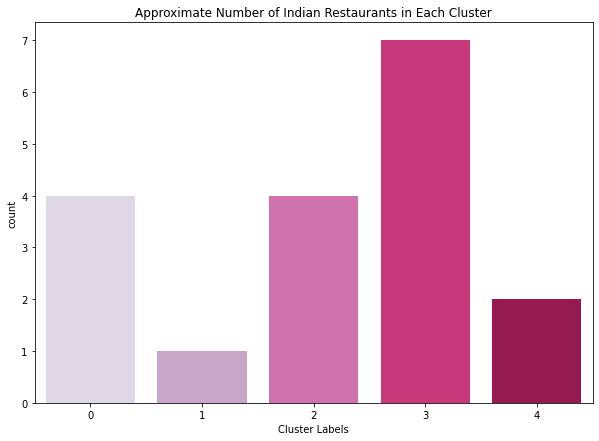

In [56]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (10, 7)

sns.countplot(x=Indian_f['Cluster Labels'],data=Indian_f, palette = 'PuRd').set_title("Approximate Number of Indian Restaurants in Each Cluster")

In this graph we can see the approximate number of Indian restaurants in each cluster. In Cluster 3 there are 7 of them. This is interesting, because cluster 3 doesn't have the highest average frequency of Indian restaurants. This might be because cluster 3 has a high number of neighborhoods compared to other clusters, and that there are other common venues in the neighborhood which makes the frequency of Indian restaurants lower.

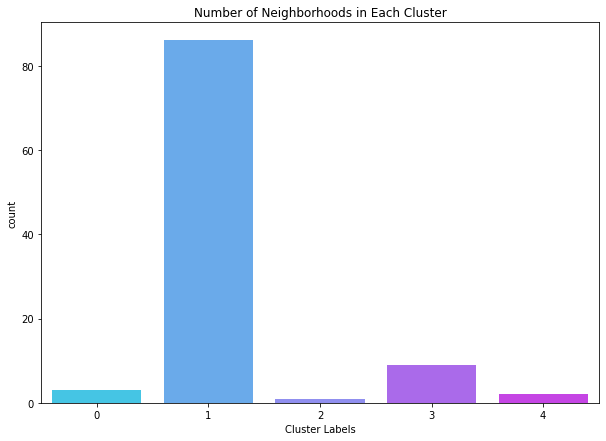

In [57]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (10, 7)

ax = sns.countplot(x=clusters['Cluster Labels'],data=clusters, palette = 'cool').set_title("Number of Neighborhoods in Each Cluster")

In this graph we can see that there are 80 neighborhoods that don't have a Indian restaurant within the radius of 1500 meters. This is surprising because of the growing number of Asian population in Austin! Maybe the Indian population is still small compared to other Asian ethnicities. But we should also note that the Foursquare data only returned the top 100 venues within 1500-meter radius. There might be Indian restaurants beyond the 100 venue limit and the radius.

In [58]:
# The code was removed by Watson Studio for sharing.

,Neighborhood Reporting Area,Total Population,non-Hispanic White Percentage,African American Percentage,Hispanic Percentage,Asian Percentage,Other Percentage,Total Housing Units,Occupied Housing Units,Vacant Housing Units,Percent Owner Occupied Housing Units,Gross Population Density: Persons Per Acre,Density Ranking,ACRES
0,ALLENDALE,"6,643",0.83,0.02,0.11,0.02,0.02,"3,612","3,263",349,0.64,5.1,60,"1,303.50"
1,ANDERSON MILL,"28,473",0.65,0.03,0.13,0.16,0.03,"11,507","10,904",603,0.67,5.0,62,"5,706.40"
2,ANDERSON MILL,"14,785",0.59,0.04,0.14,0.21,0.03,"6,108","5,681",427,0.61,3.2,74,"4,641.40"
3,STONERIDGE PLACE,"5,147",0.79,0.01,0.09,0.09,0.02,"2,195","2,076",119,0.64,2.2,84,"2,318.10"
4,BARTON HILLS,"8,022",0.78,0.01,0.14,0.04,0.02,"4,965","4,614",351,0.31,3.9,70,"2,038.10"


In [59]:

df_data_2 = df_data_2.rename(columns={"Neighborhood Reporting Area": "Neighborhood", "Asian Percentage":"Asian"})

In [60]:
asian_pop = df_data_2[['Neighborhood', 'Total Population', 'Asian']]

In [61]:
asian_pop.head()

,Neighborhood,Total Population,Asian
0,ALLENDALE,"6,643",0.02
1,ANDERSON MILL,"28,473",0.16
2,ANDERSON MILL,"14,785",0.21
3,STONERIDGE PLACE,"5,147",0.09
4,BARTON HILLS,"8,022",0.04


In [62]:
#
df_Indian_neigh=Indian_f[['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude','Cluster Labels','Indian Restaurant']]
#df_Indian_neigh.head(105)


In [63]:
df_Indian_neigh.drop_duplicates(subset=['Neighborhood'])
df_Indian_neigh_clean=df_Indian_neigh.drop_duplicates(subset=['Neighborhood'])
df_Indian_neigh_sorted=df_Indian_neigh_clean.sort_values(by='Neighborhood', ascending=True)
df_Indian_neigh_sorted.head(105)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Cluster Labels,Indian Restaurant
1178,"BRODIE LANE, Austin, TX, USA",30.221112,-97.825761,3,0.010000
3142,"EAST CESAR CHAVEZ, Austin, TX, USA",30.255896,-97.731707,3,0.010000
3332,"MCNEIL, Austin, TX, USA",30.445107,-97.744131,4,0.025641
6151,"NORTHWEST HILLS, Austin, TX, USA",30.355545,-97.768595,4,0.026316
1606,"SOUTH LAMAR, Austin, TX, USA",30.236389,-97.782647,3,0.010000
6724,"SPICEWOOD, Austin, TX, USA",30.432946,-97.770378,1,0.000000
6051,"ST. JOHNS, Austin, TX, USA",30.331136,-97.700379,3,0.014286
5816,"STONERIDGE PLACE, Austin, TX, USA",30.265536,-97.810241,3,0.010000
6614,"SWEETBRIAR, Austin, TX, USA",30.201563,-97.781185,3,0.011494
2354,"TECH RIDGE, Austin, TX, USA",30.407091,-97.666131,2,0.066667


In [64]:

# Sort population data by higher percentage to lower
#asian_sorted = asian_pop.sort_values(by='Asian', ascending=False)
#asian_sorted.head()

# Sort population data by higher percentage to lower
asian_sorted_clean=asian_pop.drop_duplicates(subset=['Neighborhood'])
asian_sorted = asian_sorted_clean.sort_values(by='Neighborhood', ascending=True)
asian_sorted['Neighborhood'] = asian_sorted['Neighborhood'] + ', Austin, TX, USA'
asian_sorted.head(105)

,Neighborhood,Total Population,Asian
0,"ALLENDALE, Austin, TX, USA","6,643",0.02
1,"ANDERSON MILL, Austin, TX, USA","28,473",0.16
4,"BARTON HILLS, Austin, TX, USA","8,022",0.04
5,"BERGSTROM, Austin, TX, USA",179,0.00
6,"BLUFF SPRINGS, Austin, TX, USA","23,000",0.01
7,"BOULDIN, Austin, TX, USA","5,510",0.01
8,"BRENTWOOD, Austin, TX, USA","7,513",0.04
9,"BRODIE LANE, Austin, TX, USA","10,913",0.04
10,"BULL CREEK, Austin, TX, USA","7,655",0.05
15,"Bear Creek, Austin, TX, USA","12,802",0.11


## Merge Sorted Population Data with Cluster Data

In [65]:
# merge population data with cluster data
left = asian_sorted
right = df_Indian_neigh_sorted
#result = pd.merge(left, outer, on=['Neighborhood'])
#df1.merge(df2, how='left', on='a')
result = pd.merge(right,left, how='inner', on=['Neighborhood'])
result.head(105)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Cluster Labels,Indian Restaurant,Total Population,Asian
0,"BRODIE LANE, Austin, TX, USA",30.221112,-97.825761,3,0.010000,"10,913",0.04
1,"EAST CESAR CHAVEZ, Austin, TX, USA",30.255896,-97.731707,3,0.010000,"3,291",0.01
2,"NORTHWEST HILLS, Austin, TX, USA",30.355545,-97.768595,4,0.026316,"11,090",0.13
3,"SOUTH LAMAR, Austin, TX, USA",30.236389,-97.782647,3,0.010000,"8,152",0.02
4,"SPICEWOOD, Austin, TX, USA",30.432946,-97.770378,1,0.000000,"1,182",0.19
5,"STONERIDGE PLACE, Austin, TX, USA",30.265536,-97.810241,3,0.010000,"5,147",0.09
6,"TECH RIDGE, Austin, TX, USA",30.407091,-97.666131,2,0.066667,"15,842",0.13
7,"West Campus, Austin, TX, USA",30.290208,-97.747384,0,0.020000,"16,408",0.19
8,"Wooten, Austin, TX, USA",30.361252,-97.722846,0,0.020000,"3,471",0.04


After I sorted and merged the cluster data and the population data, we can now see which clusters the neighborhoods with a high Asian population are in. 

## Data Visualization

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

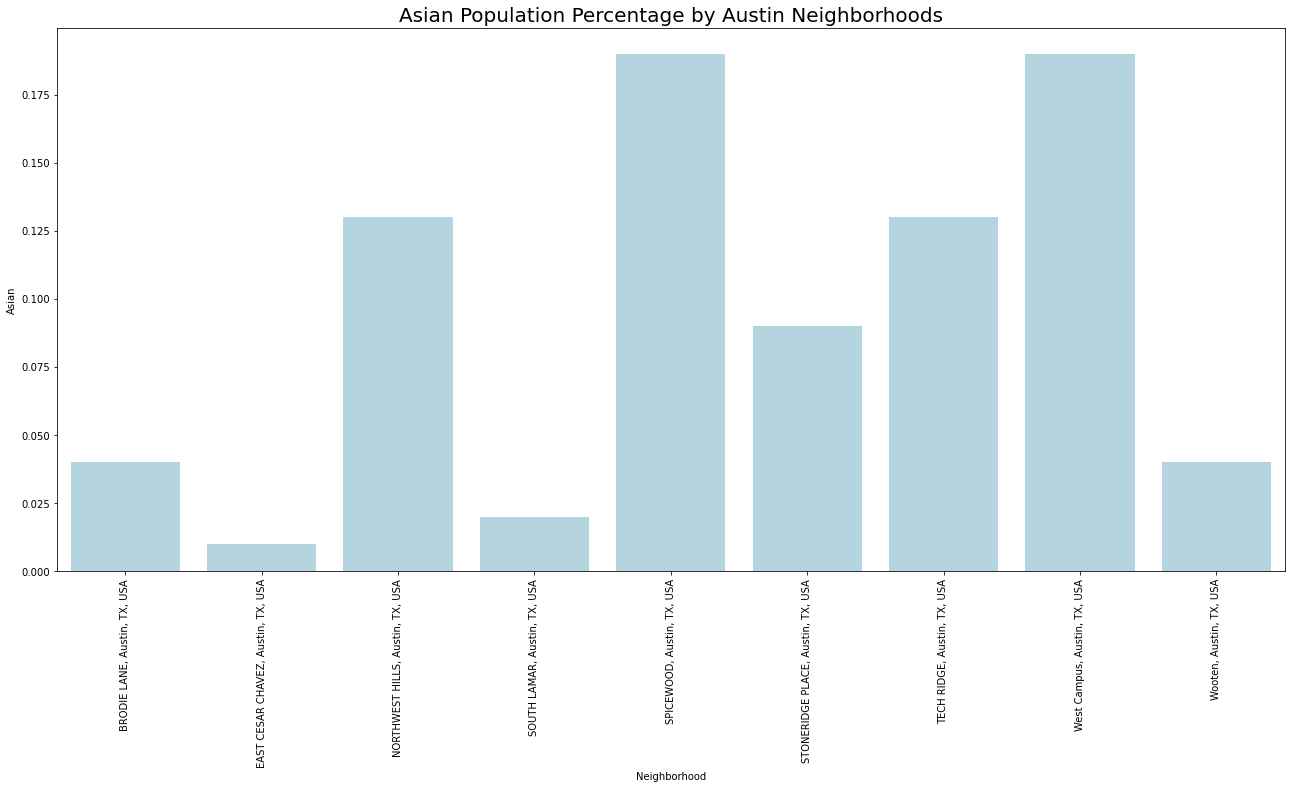

In [66]:
plt.rcParams['figure.figsize'] = (22, 10)
ax1 = sns.barplot(x=result['Neighborhood'], y = result['Asian'], data=result, color = 'lightblue').set_title("Asian Population Percentage by Austin Neighborhoods", fontsize = 20)
plt.xticks(rotation=90)

## Heatmap by Asian Population Density in Austin

In [67]:
from folium import plugins
from folium.plugins import HeatMap

asian_population_heatmap = folium.Map(location=[30.2672, -97.7431], zoom_start=11)
# create heatmap layer
heatmap = HeatMap( list(zip(result['Neighborhood Latitude'], result['Neighborhood Longitude'], result["Asian"])),
                   min_opacity=0.2,
                   max_val=result["Asian"].max(),
                   radius=50, blur=50, 
                   max_zoom=1)
# add heatmap layer to base map
heatmap.add_to(asian_population_heatmap)
asian_population_heatmap


In [68]:
asian_population_heatmap.save('indian_population_heatmap.html')

# Discussion

During our cluster analysis, we found that Cluster 1 has the lowest average frequency of Indian restaurants while Cluster 2 has the highest. However, Cluster 3 has the highest number of Indian restaurants, with a lower average frequency, which might be because Cluster 3 has a high number of neighborhoods compared to other clusters, and that there are other common venues in the neighborhood which makes the frequency of Indian restaurants lower. But all in all, compared to other venues, Cluster 3 doesn't have a high frequency of Indian restaurants. Based on the demographic data I found, the top 9 neighborhoods with the highest Asian population density don't have a high frequency of Indian restaurants. These neighborhoods include UT, Lakeline, Gateway, West University, Anderson Mill and so on. It makes sense since some of these neighborhoods have a very small total population. However, highly populated college neighborhoods like UT, West University with many Indian students don't have a high frequency of Indian restaurants. I might be biased but this should be changed (because Indian food is awesome!). Other highly populated neighborhoods like Anderson Mill (with a total population of 28473!) also don't have an average high frequency of Indian restaurants either. Does this mean that someone should open a Indian restaurant there?

After discussing (possibly) the best neighborhood to open a Indian restaurant, we should also note some limitations to this analysis. To start with, the coordinates of neighborhoods are not 100% accurate. Furthermore, I set a limit to the Foursquare API to return only the top 100 venues within the radius of 1500 meters. But the neighborhoods are very different in shapes and sizes. Some neighborhoods are much larger but less populated while others are more densely populated with a smaller area. Thus, the Foursquare API might not have been able to capture all the Indian restaurants in each neighborhood. However, we calculated the frequency of Indian restaurants within the 1500 meter radius, which could still reflect the average frequency of Indian restaurants witin that neighborhood. Lastly, because we don't have specific population data on the Indian ethnicity, it is hard to tell how much of the Asian population is Indian. Thus, before opening a restaurant, it might be better to do some research on that specific neighborhood, for example, on its commercial pricing, consumers, competitors, and take other factors into


# Conclusion

At the start of this project, we defined a business problem: where to open a Indian restaurant in Austin, TX? Then we collected the neighborhood zoning information from Austin City government and used Google Geocoding API to find the approximate coordinates for those neighborhoods. We then used Foursquare API to discover the 100 venues within the radius of 1500 meters in each neighborhood and took the average frequency of Indian restaurants in comparison to other venues. Using clustering algorithm, we grouped the neighborhoods in a total of 5 clusters, with Cluster 0 having the lowest average frequency of Indian restaurants. Finally, we compared the clusters to the neighborhood demographic data provided by the government and found that the neighborhoods with the highest percentages of Asian population don't have a very high frequency of Indian restaurants. Then I concluded that Anderson Mill is the best neighborhood to open a Indian restaurant based on our cluster analysis and the demographic data.

Overall, this project was a great practice utilizing data science concepts and machine learning algorithms. I also believe that this project would give our target audience a starting point to consider the possibility and value of a new Indian restaurant in a given neighborhood in Austin, TX. Our analysis on Austin demographics also gives an idea of where Asian population is concentrated in Austin, which could be one of the factors to consider when opening an Asian or Indian restaurant. Note that the population data is from the 2010 Census, which means that it is likely that the Asian population has gone up since then, which makes opening a Indian restaurant even more promising. And plus, everyone loves Indian food, right?